In [9]:
import sys
sys.path.append('../../')
from utils import load_results_from_h5, save_results_to_h5
from tqdm import tqdm
import os
import pylab as plt

In [4]:
project_dir = '/home/divyajyoti/ACADEMIC/Projects/Cardiff_University/Next_gen_detectability/A-sharp-study'
netw = 'CE4020ET123'
pop_num = 2
if pop_num == 2:
    pop_model_str = 'MD'
elif pop_num == 4:
    pop_model_str = 'MDhigh_zp_2.53'
elif pop_num == 5:
    pop_model_str = 'MDlow_zp_1.54'
if netw == 'CE4020ET123':
    netw_str = netw+'_CoBA10'
else:
    netw_str = netw
num_events = 5863
'CE4020ET123_CoBA10_2_PLP_z_MD_zmax_10_lmrd_22_no_spins_5863_events_pop_from_XPHM_fm2_netw'
fm_file_name = '_'.join([netw_str, str(pop_num), 'PLP_z', pop_model_str, 
                      'zmax_10_lmrd_22_no_spins', str(num_events), 
                      f'events_pop_from_XPHM_fm2_netw.h5'])
fm_file = os.path.join(project_dir, 'GWFish_analysis', 'BBH', 'Errors', 
                              fm_file_name)
fm_file

'/home/divyajyoti/ACADEMIC/Projects/Cardiff_University/Next_gen_detectability/A-sharp-study/GWFish_analysis/BBH/Errors/CE4020ET123_CoBA10_2_PLP_z_MD_zmax_10_lmrd_22_no_spins_5863_events_pop_from_XPHM_fm2_netw.h5'

In [5]:
fm_errors = load_results_from_h5(fm_file)

In [13]:
[(key, type(fm_errors[key]), len(fm_errors[key])) for key in fm_errors.keys()]

[('all_inj_params_original', dict, 65),
 ('cov', numpy.ndarray, 5863),
 ('deriv_variables_in_order', list, 9),
 ('errors', dict, 10),
 ('fm2_all_inj_params', dict, 15),
 ('fm2_cov', numpy.ndarray, 5863),
 ('fm2_errors', dict, 9),
 ('fm2_inj_params', dict, 9),
 ('fm2_netw_snrs', numpy.ndarray, 5863),
 ('fm2_sky_locs', numpy.ndarray, 5863),
 ('inj_params', dict, 11),
 ('netw_snrs', numpy.ndarray, 5863),
 ('new_cov', numpy.ndarray, 5863),
 ('new_deriv_variables_in_order', list, 9),
 ('new_mean_vals', dict, 11),
 ('sky_locs', numpy.ndarray, 5863)]

Text(0, 0.5, 'Mass Ratio (q)')

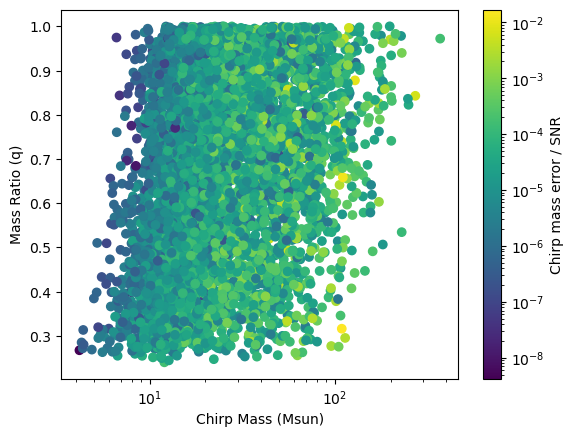

In [25]:
from matplotlib.colors import LogNorm
plt.scatter(fm_errors['inj_params']['chirp_mass'], 
            fm_errors['inj_params']['mass_ratio'],
            c=fm_errors['errors']['chirp_mass']/fm_errors['netw_snrs'], norm=LogNorm())
plt.colorbar(label='Chirp mass error / SNR')
plt.xscale('log')
plt.xlabel('Chirp Mass (Msun)')
plt.ylabel('Mass Ratio (q)')